In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Olek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Olek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Olek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
sensor_loc = pd.read_csv('data/sensor_graph/graph_sensor_locations.csv')
sensor_loc.head(n=10)

,index,sensor_id,latitude,longitude
0,0,773869,34.15497,-118.31829
1,1,767541,34.11621,-118.23799
2,2,767542,34.11641,-118.23819
3,3,717447,34.07248,-118.26772
4,4,717446,34.07142,-118.26572
5,5,717445,34.06913,-118.25932
6,6,773062,34.05368,-118.23369
7,7,767620,34.13486,-118.22932
8,8,737529,34.20264,-118.47352
9,9,717816,34.15562,-118.46860


In [3]:
min_latitude = min(sensor_loc['latitude'])
max_latitude = max(sensor_loc['latitude'])
min_longitude = min(sensor_loc['longitude'])
max_longitude = max(sensor_loc['longitude'])

print(f"Minimum latitude {min_latitude}")
print(f"Maximum latitude {max_latitude}")

print(f"Minimum longitude {min_longitude}")
print(f"Maximum longitude {max_longitude}")

print(f"Centre: {(min_latitude + max_latitude) / 2},{(min_longitude + max_longitude) / 2}")

Minimum latitude 34.04301
Maximum latitude 34.22164
Minimum longitude -118.5368
Maximum longitude -118.1829
Centre: 34.132325,-118.35985


<IPython.core.display.Javascript object>


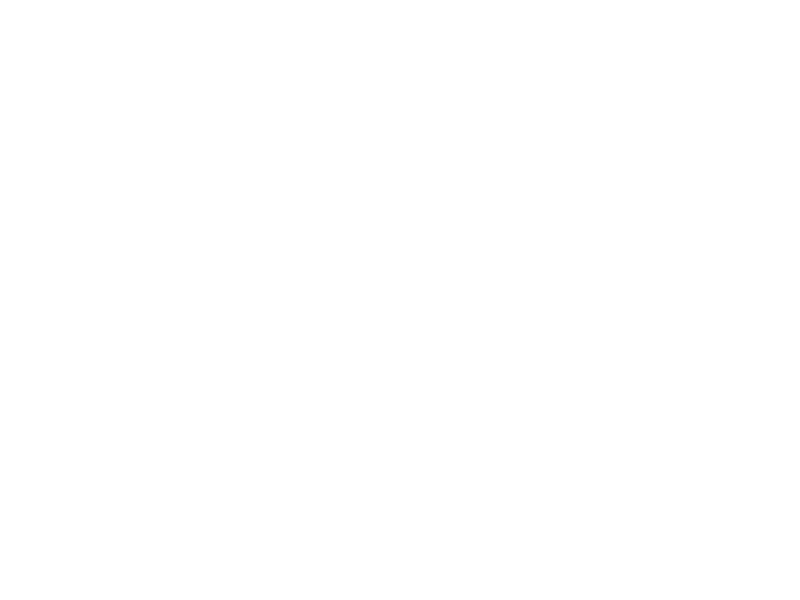

In [4]:
%matplotlib notebook
img = plt.imread("background.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-118.5368, -118.1829, 34.04301, 34.22164])
plt.scatter(sensor_loc['longitude'], sensor_loc['latitude'], s=20, c='navy', marker='8')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.tick_params(axis='both', which='minor', labelsize=6)
ax.set_aspect('auto')
plt.grid()

plt.xlabel(r'$Longitude$')
plt.ylabel(r'$Latitude$')

plt.show()

In [5]:
min_selected_longitude = -118.300
max_selected_longitude = -118.220
min_selected_latitude = 34.100
max_selected_latitude = 34.170

sensor_loc.drop(sensor_loc[(sensor_loc['latitude'] > max_selected_latitude)].index, inplace=True)
sensor_loc.drop(sensor_loc[(sensor_loc['latitude'] < min_selected_latitude)].index, inplace=True)
sensor_loc.drop(sensor_loc[(sensor_loc['longitude'] > max_selected_longitude)].index, inplace=True)
sensor_loc.drop(sensor_loc[(sensor_loc['longitude'] < min_selected_longitude)].index, inplace=True)

sensor_loc = sensor_loc.reset_index(drop=True)

In [6]:
# Drop one of the sensors to get a nice round number
sensor_loc.drop([sensor_loc.index[20]], inplace=True)
sensor_loc.drop('index', axis=1, inplace=True)
print(f"Reduced the size to {len(sensor_loc)} sensors")

Reduced the size to 50 sensors


<IPython.core.display.Javascript object>


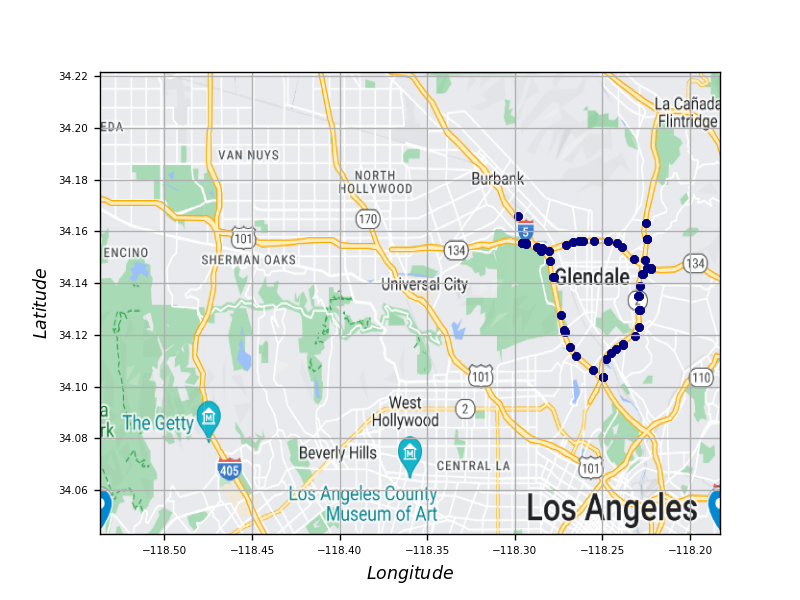

In [7]:
%matplotlib notebook
img = plt.imread("background.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-118.5368, -118.1829, 34.04301, 34.22164])
plt.scatter(sensor_loc['longitude'], sensor_loc['latitude'], s=20, c='navy', marker='8')
ax.tick_params(axis='both', which='major', labelsize=6)
ax.tick_params(axis='both', which='minor', labelsize=6)
ax.set_aspect('auto')

plt.xlabel(r'$Longitude$')
plt.ylabel(r'$Latitude$')

plt.grid()
plt.show()

In [8]:
# Find all pairs where the distance is one-sided only
sensor_dist = pd.read_csv('data/sensor_graph/distances_la_2012.csv')
no_dist = sensor_dist[sensor_dist.cost == 0]
no_dist = no_dist[(no_dist['from'] != no_dist['to'])]

no_dist_from = set(no_dist['from'])
no_dist_to = set(no_dist['to'])

# Check if we have no one-sided distances in the selected sensors
no_dist = no_dist_from.union(no_dist_to)
sensor_loc[sensor_loc['sensor_id'].isin(no_dist)]

,sensor_id,latitude,longitude


In [9]:
sensor_loc.iloc[0:-1]['sensor_id'].to_csv('data/sensor_graph/graph_sensor_ids_small.csv',
                               header=False, index=False, line_terminator=',')
sensor_loc.iloc[[-1]]['sensor_id'].to_csv('data/sensor_graph/graph_sensor_ids_small.csv',
                               header=False, index=False, mode='a', line_terminator='')